In [6]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog', 'The quick brown dog jumps on the log.')
scores

{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765),
 'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471)}

In [7]:
import evaluate
rouge = evaluate.load('rouge')
predictions = ["Transformers Transformers are fast plus efficient", 
               "Good Morning", "I am waiting for new Transformers"]
references = [
              "HuggingFace Transformers are fast efficient plus awesome", 
               "Transformers are awesome because they are fast to execute", 
              "Good Morning Transformers"]
results = rouge.compute(predictions=predictions, references=references)
print(results)

{'rouge1': 0.33048433048433046, 'rouge2': 0.1212121212121212, 'rougeL': 0.2792022792022792, 'rougeLsum': 0.2792022792022792}


In [10]:
import evaluate
import pandas as pd
from datasets import load_dataset
import numpy as np
model_name = "google/flan-t5-large"
category_name = "classification"
dataset = load_dataset('HuggingFaceH4/databricks_dolly_15k')

def calc_rouge(model_name, category_name):
    df_ref = pd.read_csv(f'/home/uj-user/Yo/KODEL/KODEL/T5_piechart/d_{model_name}/{category_name}.csv')
    df = pd.DataFrame(dataset['train'])
    if category_name!="All":
        df = df[df['category']==category_name]

    if len(df_ref) != len(df):
        raise ValueError("Lengths of true_list and pred_list do not match")

    rouge = evaluate.load('rouge')
    results = rouge.compute(predictions=df['output'].to_list(), references=df_ref['0'].to_list())
    return results

  0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
model_list = ['google/t5-v1_1-small', 'google/t5-v1_1-base', 'google/t5-v1_1-large', 'google/t5-v1_1-xl',
              'google/flan-t5-small', 'google/flan-t5-base', 'google/flan-t5-large', 'google/flan-t5-xl',
              't5-small', 't5-base', 't5-large', 't5-3b'
              ]
category_list = ['open_qa', 'general_qa', 'classification', 'closed_qa', 'brainstorming', 'information_extraction', 'summarization', 'creative_writing', 'All']
    
for category in category_list:            
    for model in model_list:
        result = calc_rouge(model, category)
        print(f'{model} / {category} -> {result}')

google/t5-v1_1-small / open_qa -> {'rouge1': 0.12332254192130737, 'rouge2': 0.03001518633385475, 'rougeL': 0.0915830387214912, 'rougeLsum': 0.09247024670767161}
google/t5-v1_1-base / open_qa -> {'rouge1': 0.15188022447503344, 'rouge2': 0.03321890026171935, 'rougeL': 0.10712806133325019, 'rougeLsum': 0.10829768070599015}
google/t5-v1_1-large / open_qa -> {'rouge1': 0.004613553564348652, 'rouge2': 0.0005359765782717786, 'rougeL': 0.004517816480252135, 'rougeLsum': 0.004513453071459702}
google/t5-v1_1-xl / open_qa -> {'rouge1': 0.037585786981084265, 'rouge2': 0.009795533779119705, 'rougeL': 0.02992766366535988, 'rougeLsum': 0.03014455272241064}
google/flan-t5-small / open_qa -> {'rouge1': 0.06133802937547475, 'rouge2': 0.019540830048935226, 'rougeL': 0.05765388618574341, 'rougeLsum': 0.05797353041634692}
google/flan-t5-base / open_qa -> {'rouge1': 0.06090588690264766, 'rouge2': 0.01541402423771071, 'rougeL': 0.056586124635178335, 'rougeLsum': 0.0568832449583907}
google/flan-t5-large / ope

In [51]:
model_list = ['google/t5-v1_1-small', 'google/t5-v1_1-base', 'google/t5-v1_1-large', 'google/t5-v1_1-xl',
              'google/flan-t5-small', 'google/flan-t5-base', 'google/flan-t5-large', 'google/flan-t5-xl',
              't5-small', 't5-base', 't5-large', 't5-3b'
              ]
category_list = ['open_qa', 'general_qa', 'classification', 'closed_qa', 'brainstorming', 'information_extraction', 'summarization', 'creative_writing', 'All']
                
for model in model_list:
    for category in ['All']:
        result = calc_rouge(model, category)
        print(f'{model} / {category} -> {result}')

google/t5-v1_1-small / All -> {'rouge1': 0.14210639942904862, 'rouge2': 0.039475228235635075, 'rougeL': 0.1074276403097265, 'rougeLsum': 0.10948409529175078}
google/t5-v1_1-base / All -> {'rouge1': 0.17400351693133434, 'rouge2': 0.040877087523987145, 'rougeL': 0.11798049507499234, 'rougeLsum': 0.12128040291490726}
google/t5-v1_1-large / All -> {'rouge1': 0.08518723077385276, 'rouge2': 0.023593668333073577, 'rougeL': 0.058753259583600115, 'rougeLsum': 0.060457704729905054}
google/t5-v1_1-xl / All -> {'rouge1': 0.11480197856190394, 'rouge2': 0.03165722989535956, 'rougeL': 0.07965735315814024, 'rougeLsum': 0.08180092054814309}
google/flan-t5-small / All -> {'rouge1': 0.10653806936369171, 'rouge2': 0.035448968899604055, 'rougeL': 0.10008202845525323, 'rougeLsum': 0.10099650851016977}
google/flan-t5-base / All -> {'rouge1': 0.11653453450930105, 'rouge2': 0.03991293392236589, 'rougeL': 0.11014785325332119, 'rougeLsum': 0.1110976973797689}
google/flan-t5-large / All -> {'rouge1': 0.1345531282

In [23]:
def calculate_accuracy(model_name, category_name):
    df_ref = pd.read_csv(f'/home/uj-user/Yo/KODEL/KODEL/T5_piechart/d_{model_name}/{category_name}.csv')
    df = pd.DataFrame(dataset['train'])
    if category_name!="All":
        df = df[df['category']==category_name]

    true_list = df['output'].to_list()
    pred_list = df_ref['0'].to_list()
    if len(true_list) != len(pred_list):
        raise ValueError("Lengths of true_list and pred_list do not match")

    correct = 0
    total = len(true_list)

    
    for i in range(total):
        
        if  str(pred_list[i]) in str(true_list[i]):
            correct += 1

    accuracy = correct / total
    return accuracy

In [24]:
model_list = ['google/t5-v1_1-small', 'google/t5-v1_1-base', 'google/t5-v1_1-large', 'google/t5-v1_1-xl',
              'google/flan-t5-small', 'google/flan-t5-base', 'google/flan-t5-large', 'google/flan-t5-xl',
              't5-small', 't5-base', 't5-large', 't5-3b'
              ]
category_list = ['open_qa', 'general_qa', 'classification', 'closed_qa', 'brainstorming', 'information_extraction', 'summarization', 'creative_writing', 'All']
    
for category in ['classification']:            
    for model in model_list:
        result = calculate_accuracy(model, category)
        print(f'{model} / {category} -> {result}')

google/t5-v1_1-small / classification -> 0.00046816479400749064
google/t5-v1_1-base / classification -> 0.00046816479400749064
google/t5-v1_1-large / classification -> 0.004213483146067416
google/t5-v1_1-xl / classification -> 0.0014044943820224719
google/flan-t5-small / classification -> 0.47097378277153557
google/flan-t5-base / classification -> 0.6390449438202247
google/flan-t5-large / classification -> 0.4606741573033708
google/flan-t5-xl / classification -> 0.6081460674157303
t5-small / classification -> 0.003745318352059925
t5-base / classification -> 0.0009363295880149813
t5-large / classification -> 0.00046816479400749064
t5-3b / classification -> 0.017322097378277154


In [30]:
model_list = ['google/t5-v1_1-small', 'google/t5-v1_1-base', 'google/t5-v1_1-large', 'google/t5-v1_1-xl',
              'google/flan-t5-small', 'google/flan-t5-base', 'google/flan-t5-large', 'google/flan-t5-xl',
              #'t5-small', 't5-base', 't5-large', 't5-3b'
              ]
category_list = ['open_qa', 'general_qa', 'classification', 'closed_qa', 'brainstorming', 'information_extraction', 'summarization', 'creative_writing', 'All']
    
for category in ['All']:            
    for model in model_list:
        result = calc_rouge(model, category)
        print(np.round(result['rougeL'],2))#, model, )
        #print(f'{model} / {category} -> {result}')

0.11
0.12
0.06
0.08
0.1
0.11
0.13
0.15


['brainstorming.csv', 'general_qa.csv', 'creative_writing.csv', 'information_extraction.csv', 'open_qa.csv', 'classification.csv', 'All.csv', 'summarization.csv', 'closed_qa.csv']


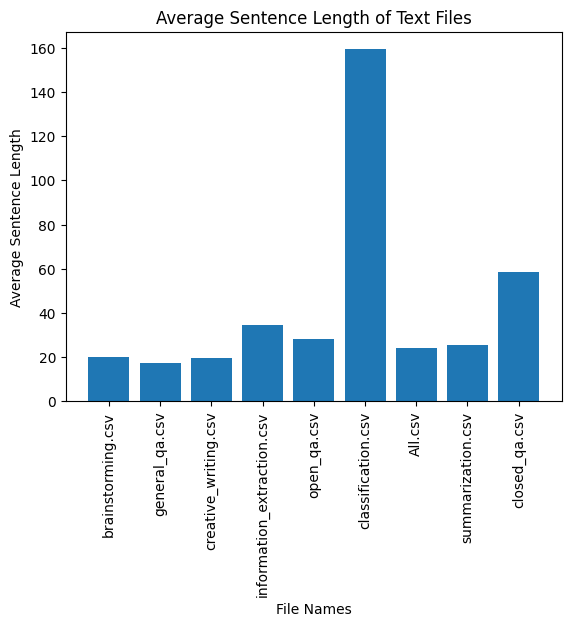

In [31]:
import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_path = "/home/uj-user/Yo/KODEL/KODEL/T5_piechart/d_google/flan-t5-base"
file_extension = ".csv"

# 폴더 내의 모든 파일명을 가져옵니다.
file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
print(file_names)

# 파일별로 평균 문장 길이를 구합니다.
avg_lengths = []
for file_name in file_names:
    with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
        text = f.read()
        sentences = text.split('.')
        sentence_lengths = [len(sentence.split()) for sentence in sentences]
        avg_length = sum(sentence_lengths) / len(sentence_lengths)
        avg_lengths.append(avg_length)

# 시각화합니다.
plt.bar(file_names, avg_lengths)
plt.xticks(rotation=90)
plt.title("Average Sentence Length of Text Files")
plt.xlabel("File Names")
plt.ylabel("Average Sentence Length")
plt.show()


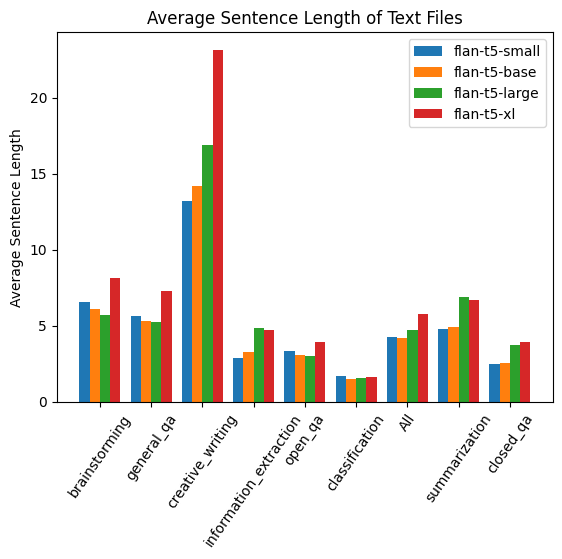

In [62]:
import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 시각화합니다.
fig, ax = plt.subplots()
bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    ax.bar(x, folder_avg_lengths, width=bar_width, label=f"{folder_paths[i][11:]}")

ax.set_xticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax.set_xticklabels([f.split('.')[0] for f in file_names], rotation=55)
ax.set_title("Average Sentence Length of Text Files")
ax.set_ylabel("Average Sentence Length")
ax.legend()
plt.show()


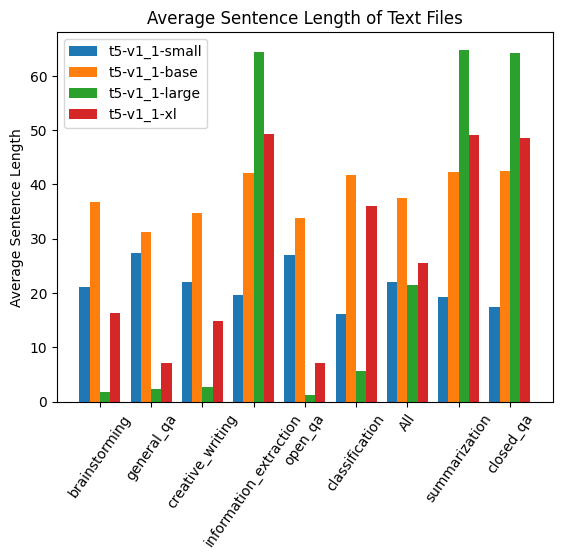

In [104]:
import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/t5-v1_1-small", "./d_google/t5-v1_1-base", "./d_google/t5-v1_1-large",  "./d_google/t5-v1_1-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 시각화합니다.
fig, ax = plt.subplots()
bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    ax.bar(x, folder_avg_lengths, width=bar_width, label=f"{folder_paths[i][11:]}", )

ax.set_xticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax.set_xticklabels([f.split('.')[0] for f in file_names], rotation=55)
ax.set_title("Average Sentence Length of Text Files")
ax.set_ylabel("Average Sentence Length")
ax.legend()
plt.show()


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
[21.10169491525424, 27.438212494300046, 22.134642356241233, 19.6776750330251, 26.97979518405757, 16.148269410664174, 22.06179663048545, 19.305928853754942, 17.418082191780822]
[0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2]
[36.72768361581921, 31.159142726858185, 34.76157082748948, 42.18163804491414, 33.81040686410186, 41.762394761459305, 37.58600253046547, 42.30671936758893, 42.45753424657534]
[0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4]
[1.732768361581921, 2.3634290925672596, 2.7419354838709675, 64.45244385733157, 1.2150567395516192, 5.751637043966324, 21.544183258973163, 64.80553359683795, 64.15561643835616]
[0.6000000000000001, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]
[16.257062146892654, 7.1126310989512085, 14.805049088359047, 49.24900924702774, 7.04926653750346, 35.94574368568756, 25.472064993007923, 49.08774703557312, 48.5545205479452]


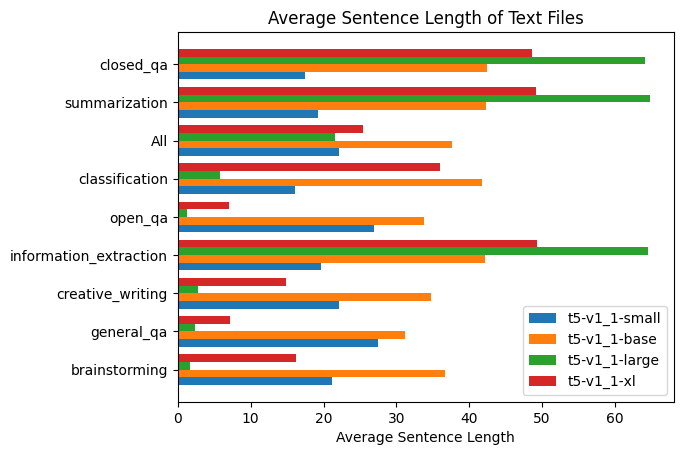

In [127]:
import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/t5-v1_1-small", "./d_google/t5-v1_1-base", "./d_google/t5-v1_1-large",  "./d_google/t5-v1_1-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 시각화합니다.
fig, ax = plt.subplots()
bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    print(x)
    print(folder_avg_lengths)
    ax.barh(x, folder_avg_lengths, height=bar_width, label=f"{folder_paths[i][11:]}")

ax.set_yticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax.set_yticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax.set_title("Average Sentence Length of Text Files")
ax.set_xlabel("Average Sentence Length")
ax.legend()
plt.show()


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
[6.5299435028248585, 5.660282717738258, 13.186535764375877, 2.882430647291942, 3.3241073899806257, 1.6833489242282507, 4.256908836651794, 4.804743083003952, 2.4706849315068493]
[0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2]
[6.100564971751412, 5.321477428180574, 14.208976157082748, 3.2450462351387053, 3.0451148629947413, 1.4864359214218896, 4.167343677165879, 4.939130434782609, 2.546849315068493]
[0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4]
[5.712429378531073, 5.273141814865481, 16.873772791023843, 4.8500660501981505, 3.0185441461389426, 1.5322731524789523, 4.716787640673903, 6.91699604743083, 3.757808219178082]
[0.6000000000000001, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]
[8.145197740112994, 7.264477884176927, 23.159887798036465, 4.715323645970938, 3.901190146692499, 1.608044901777362, 5.805686888193381, 6.695652173913044, 3.9386301369863013]


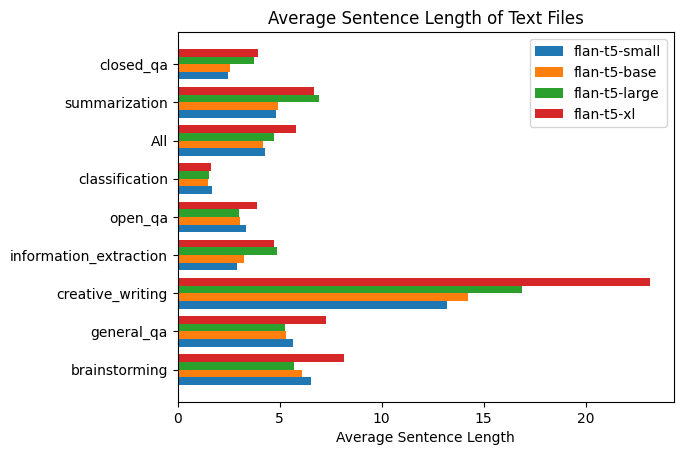

In [1]:

import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 시각화합니다.
fig, ax = plt.subplots()
bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    print(x)
    print(folder_avg_lengths)
    ax.barh(x, folder_avg_lengths, height=bar_width, label=f"{folder_paths[i][11:]}")

ax.set_yticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax.set_yticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax.set_title("Average Sentence Length of Text Files")
ax.set_xlabel("Average Sentence Length")
ax.legend()

plt.savefig('../t5_pca_image/averge_sentence.svg')

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
[6.5299435028248585, 5.660282717738258, 13.186535764375877, 2.882430647291942, 3.3241073899806257, 1.6833489242282507, 4.256908836651794, 4.804743083003952, 2.4706849315068493]
[0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2]
[6.100564971751412, 5.321477428180574, 14.208976157082748, 3.2450462351387053, 3.0451148629947413, 1.4864359214218896, 4.167343677165879, 4.939130434782609, 2.546849315068493]
[0.4, 1.4, 2.4, 3.4, 4.4, 5.4, 6.4, 7.4, 8.4]
[5.712429378531073, 5.273141814865481, 16.873772791023843, 4.8500660501981505, 3.0185441461389426, 1.5322731524789523, 4.716787640673903, 6.91699604743083, 3.757808219178082]
[0.6000000000000001, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]
[8.145197740112994, 7.264477884176927, 23.159887798036465, 4.715323645970938, 3.901190146692499, 1.608044901777362, 5.805686888193381, 6.695652173913044, 3.9386301369863013]


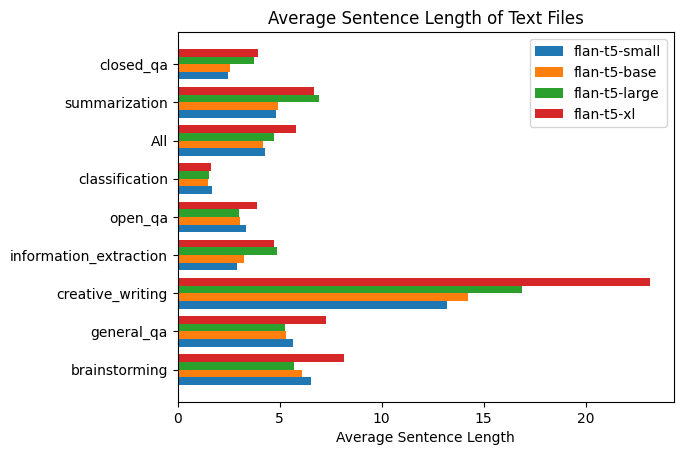

In [6]:

import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 시각화합니다.
fig, ax = plt.subplots()
bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    print(x)
    print(folder_avg_lengths)
    ax.barh(x, folder_avg_lengths, height=bar_width, label=f"{folder_paths[i][11:]}")

ax.set_yticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax.set_yticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax.set_title("Average Sentence Length of Text Files")
ax.set_xlabel("Average Sentence Length")
ax.legend()

plt.savefig('../t5_pca_image/averge_sentence.svg')

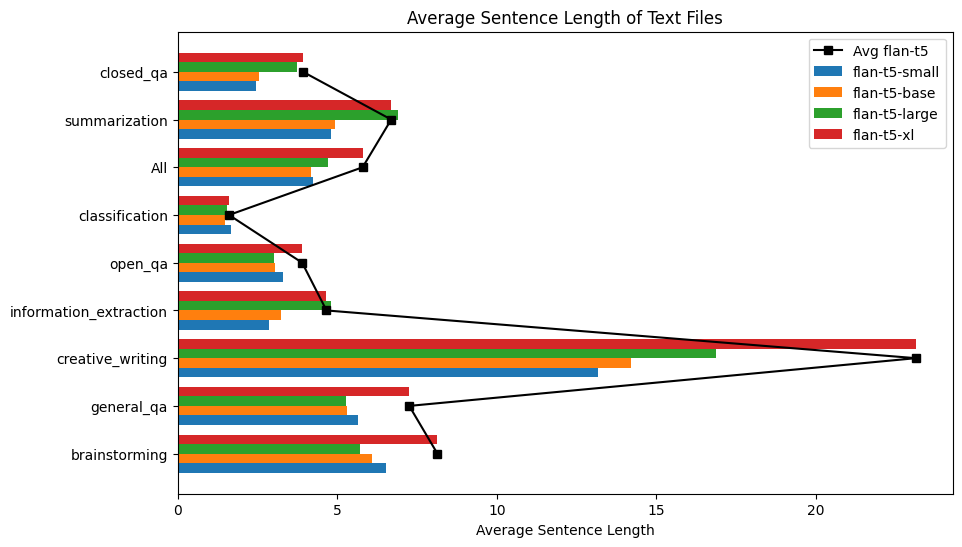

In [17]:
import os
import matplotlib.pyplot as plt
import re

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 폴더별 값의 평균을 구합니다.
folder_avg_lengths = [sum(x) / len(x) for x in avg_lengths]

# 시각화합니다.
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    ax.barh(x, folder_avg_lengths, height=bar_width, label=f"{folder_paths[i][11:]}")

# line plot을 추가합니다.
ax.plot(folder_avg_lengths, [j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))], color='k', label='Avg flan-t5', marker='s',)

ax.set_yticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax.set_yticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax.set_title("Average Sentence Length of Text Files")
ax.set_xlabel("Average Sentence Length")
ax.legend()

#plt.savefig('../t5_pca_image/averge_sentence.svg')


[18.26483051 16.24099407 17.95792426 43.17073976 16.49916967 24.3001637
 25.94769262 43.11304348 42.43863014]
folder_avg_lengths: [18.26483051 16.24099407 17.95792426 43.17073976 16.49916967 24.3001637
 25.94769262 43.11304348 42.43863014]


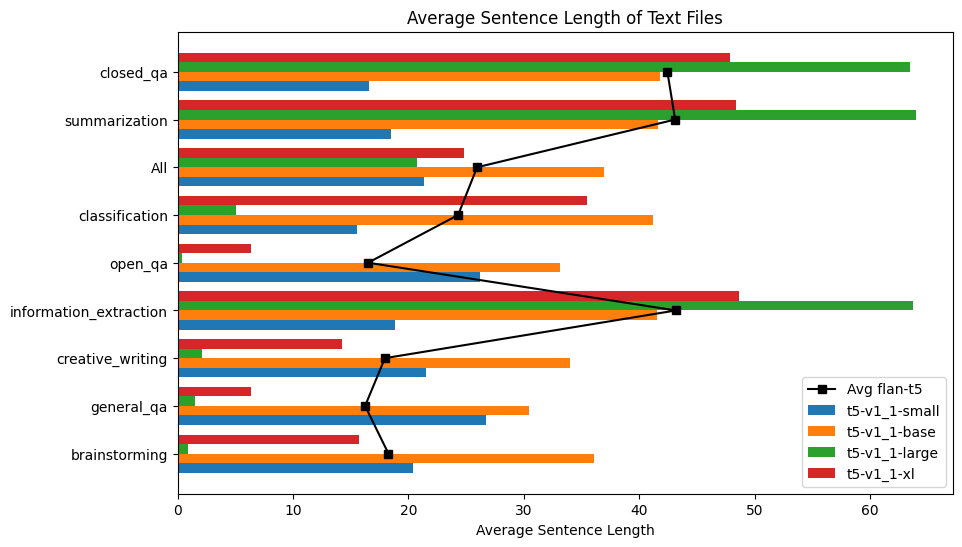

In [31]:
import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/t5-v1_1-small", "./d_google/t5-v1_1-base", "./d_google/t5-v1_1-large",  "./d_google/t5-v1_1-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 폴더별 값의 평균을 구합니다.

np_avg_length = np.array(avg_lengths)
folder_avg = np.mean(np_avg_length, axis=0)


print(folder_avg)
    
    
# 시각화합니다.
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    ax.barh(x, folder_avg_lengths, height=bar_width, label=f"{folder_paths[i][11:]}")

# line plot을 추가합니다.
print('folder_avg_lengths:', folder_avg)
ax.plot(folder_avg, [j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg))], color='k', label='Avg flan-t5', marker='s',)

ax.set_yticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg))])
ax.set_yticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax.set_title("Average Sentence Length of Text Files")
ax.set_xlabel("Average Sentence Length")
ax.legend()

#plt.savefig('../t5_pca_image/averge_sentence.svg')

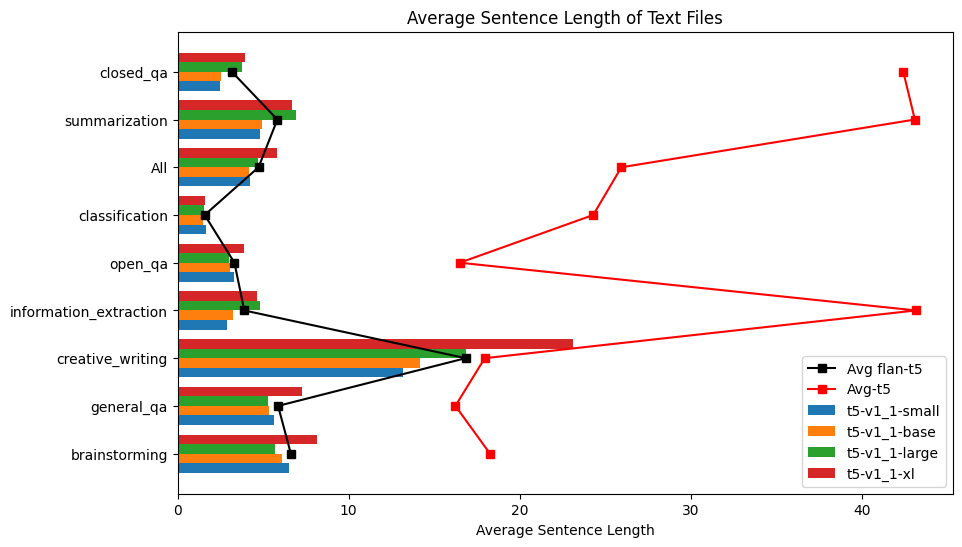

In [37]:
import os
import matplotlib.pyplot as plt

import numpy as np
# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)

    avg_lengths.append(folder_avg_lengths)


folder_paths = ["./d_google/t5-v1_1-small", "./d_google/t5-v1_1-base", "./d_google/t5-v1_1-large",  "./d_google/t5-v1_1-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
n_avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence.split()) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)

    n_avg_lengths.append(folder_avg_lengths)

# 시각화합니다.
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    ax.barh(x, folder_avg_lengths, height=bar_width, label=f"{folder_paths[i][11:]}")


np_avg_length = np.array(avg_lengths)
folder_avg_lengths = np.mean(np_avg_length, axis=0)

np_avg_length = np.array(n_avg_lengths)
t5_folder_avg_lengths = np.mean(np_avg_length, axis=0)

# line plot을 추가합니다.
ax.plot(folder_avg_lengths, [j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))], color='k', label='Avg flan-t5', marker='s',)
ax.plot(t5_folder_avg_lengths, [j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(t5_folder_avg_lengths))], color='r', label='Avg-t5', marker='s',)

ax.set_yticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax.set_yticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax.set_title("Average Sentence Length of Text Files")
ax.set_xlabel("Average Sentence Length")
ax.legend()



#plt.savefig('../t5_pca_image/averge_sentence.svg')

In [63]:
import matplotlib
matplotlib.rc('font', family="Malgun gothic")

In [67]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


np_n_avg_length [[33.53559322033898, 29.48016415868673, 66.86816269284712, 17.39564068692206, 18.312482701356213, 10.337231057062676, 23.32037024705334, 29.39209486166008, 14.653150684931507], [31.913559322033898, 27.918832649338807, 74.49088359046283, 19.591809775429326, 17.35427622474398, 9.162768942937324, 23.24139308783379, 30.383399209486164, 15.238356164383562], [30.467231638418077, 28.141358869129046, 89.22861150070126, 30.22655217965654, 17.49986161084971, 9.273620205799812, 26.82446560564693, 42.507509881422926, 22.454794520547946], [44.20338983050848, 39.50205198358413, 124.54277699859747, 29.28996036988111, 22.638250761140327, 9.775491113189897, 32.99047745887994, 41.239525691699605, 23.316712328767125]]
t5_folder_avg_lengths [[56.159887005649715, 48.56817145462836, 63.8288920056101, 175.69352708058125, 44.40437309714918, 68.5710944808232, 89.67630019311447, 178.6679841897233, 162.3013698630137], [55.103389830508476, 43.13497492020064, 63.047685834502104, 216.59907529722588,

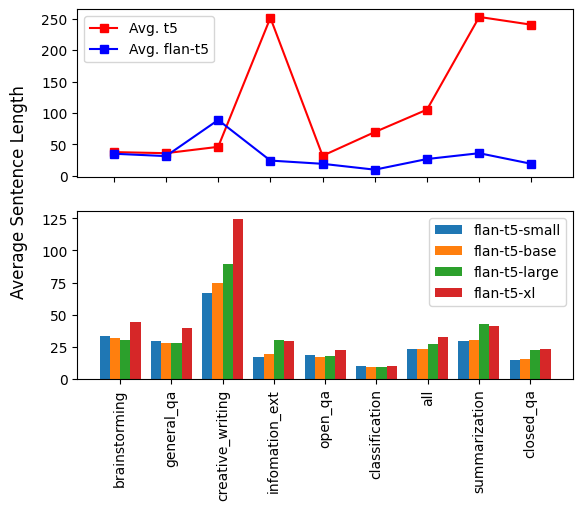

In [31]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]
file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)
    
# folder_paths = ["./d_google/t5-v1_1-small", "./d_google/t5-v1_1-base", "./d_google/t5-v1_1-large",  "./d_google/t5-v1_1-xl"]
folder_paths = ["./d_t5-small", "./d_t5-base", "./d_t5-large",  "./d_t5-3b"]
#folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]

file_extension = ".csv"
# 폴더별로 평균 문장 길이를 구합니다.
n_avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
            sentences = text.split('\n')
            #text = f.readline()
            sentence_lengths = [len(sentence) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    n_avg_lengths.append(folder_avg_lengths)
    
# 시각화합니다.
folder_paths = ["./d_t5-small", "./d_t5-base", "./d_t5-large",  "./d_t5-3b"]
folder_paths = ["flan-t5-small", "flan-t5-base", "flan-t5-large",  "flan-t5-xl"]

fig, ax = plt.subplots(2)
bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    ax[1].bar(x, folder_avg_lengths, width=bar_width, label=f"{folder_paths[i]}", )

np_avg_length = np.array(avg_lengths)
folder_avg_lengths = np.mean(np_avg_length, axis=0)

np_n_avg_length = np.array(n_avg_lengths)
t5_folder_avg_lengths = np.mean(np_n_avg_length, axis=0)

print('np_n_avg_length', avg_lengths)
print('t5_folder_avg_lengths', n_avg_lengths)
# line plot을 추가합니다.
ax[0].plot([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(t5_folder_avg_lengths))], t5_folder_avg_lengths, color='r', label='Avg. t5', marker='s',)
ax[0].plot([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))], folder_avg_lengths, color='b', label='Avg. flan-t5', marker='s',)

ax[0].set_xticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax[0].set_xticklabels([])
ax[0].set_xlim((-0.4,9.1))
#ax[0].set_xticks([])
ax[1].set_xticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
file_names = ['brainstorming', 'general_qa', 'creative_writing', 'infomation_ext', 'open_qa', 'classification', 'all', 'summarization', 'closed_qa']
ax[1].set_xticklabels([f.split('.')[0] for f in file_names], rotation=90)
#ax.set_title("Average Sentence Length of Text Files")

ax[0].legend()
ax[1].legend()

fig.supylabel("Average Sentence Length")
plt.savefig('../t5_pca_image/averge_sentence2.svg')

In [21]:
[j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))]

[0.30000000000000004, 1.3, 2.3, 3.3, 4.3, 5.3, 6.3, 7.3, 8.3]

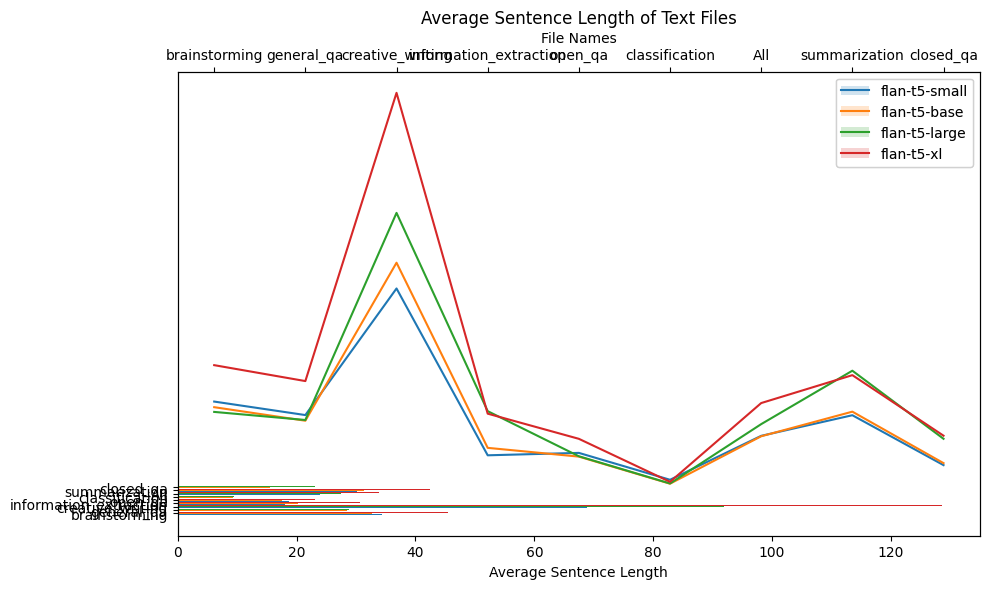

In [1]:
import os
import matplotlib.pyplot as plt

# 폴더 경로와 파일 확장자를 지정합니다.
folder_paths = ["./d_google/flan-t5-small", "./d_google/flan-t5-base", "./d_google/flan-t5-large",  "./d_google/flan-t5-xl"]
file_extension = ".csv"

# 폴더별로 평균 문장 길이를 구합니다.
avg_lengths = []
for folder_path in folder_paths:
    file_names = [f for f in os.listdir(folder_path) if f.endswith(file_extension)]
    folder_avg_lengths = []
    for file_name in file_names:
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            text = f.read()
            sentences = text.split('\n')
            sentence_lengths = [len(sentence) for sentence in sentences]
            avg_length = sum(sentence_lengths) / len(sentence_lengths)
            folder_avg_lengths.append(avg_length)
    avg_lengths.append(folder_avg_lengths)

# 시각화합니다.
fig, ax1 = plt.subplots(figsize=(10, 6))

# bar plot
bar_width = 0.2
for i, folder_avg_lengths in enumerate(avg_lengths):
    x = [j + bar_width * i for j in range(len(folder_avg_lengths))]
    ax1.barh(x, folder_avg_lengths, height=bar_width, label=f"{folder_paths[i][11:]}")

ax1.set_yticks([j + 0.5 * bar_width * (len(folder_paths) - 1) for j in range(len(folder_avg_lengths))])
ax1.set_yticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax1.set_title("Average Sentence Length of Text Files")
ax1.set_xlabel("Average Sentence Length")
ax1.legend()

# line plot
ax2 = ax1.twiny()
x = [i + 0.5 * bar_width * (len(folder_paths) - 1) for i in range(len(file_names))]
for i, folder_avg_lengths in enumerate(avg_lengths):
    ax2.plot(x, folder_avg_lengths, label=f"{folder_paths[i][11:]}")

ax2.set_xticks(x)
ax2.set_xticklabels([f.split('.')[0] for f in file_names], rotation=0)
ax2.set_xlabel("File Names")
ax2.set_ylabel("Average Sentence Length")
ax2.legend()

plt.tight_layout()
plt.show()
